In [ ]:
import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN,self).__init__()
        self.fc1 = nn.Linear(input_size,50)
        self.fc2 = nn.Linear(50,num_classes)

    def forward(self,x):
        # apply layer one, use relu activation function
        x = F.relu(self.fc1(x))
        # apply layer two that has the output size of the num_classes
        x = self.fc2(x)
        return x

In [ ]:
# test if it works as expected
model = NN(784,10)
x = torch.randn(64,784)
print(model(x).shape)

torch.Size([64, 10])


In [ ]:
for p in model.parameters():
    if p.requires_grad:
         print(p.data.shape)

torch.Size([50, 784])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1

train_dataset = datasets.MNIST(root='dataset/',train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='dataset/',train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

model = NN(input_size=input_size, num_classes=num_classes).to(device)

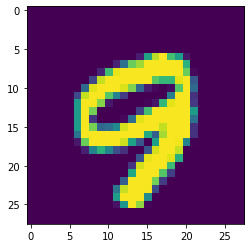

In [ ]:
for batch_idx, (data,targets) in enumerate(train_loader):
    data = data.to(device)
    targets = targets.to(device)
    plt.imshow(data[0][0].cpu())
    break

In [ ]:
for epoch in range(num_epochs):
    for batch_idx, (data,targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        data = data.reshape(data.shape[0],-1) # transforms 64,1,28,28 into 64,784

        scores = model(data.to(device)) # call forward
        loss = criterion(scores,targets) # compute loss

        optimizer.zero_grad() # set model weights gradients to 0 for each batch
        loss.backward() # backpropagation (compute gradients)

        optimizer.step() # update weights based on gradients

In [ ]:
def check_accuracy(loader,model):
    if loader.dataset.train:
        print("checking on training data")
    else:
        print("checking on test data")
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad(): # don't compute gradients on testing
        for x,y in loader:
            x = x.to(device)
            y = y.to(device)
        
            x = x.reshape(x.shape[0],-1)
            
            scores = model(x)
            _,predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            print(f"correct: {num_correct}, total: {num_samples}, accuracy: {num_correct/num_samples}")

    model.train()
    return num_correct/num_samples

check_accuracy(train_loader,model)

checking on training data
correct: 15, total: 64, accuracy: 0.234375
correct: 20, total: 128, accuracy: 0.15625
correct: 27, total: 192, accuracy: 0.140625
correct: 32, total: 256, accuracy: 0.125
correct: 43, total: 320, accuracy: 0.13437500596046448
correct: 54, total: 384, accuracy: 0.140625
correct: 60, total: 448, accuracy: 0.133928582072258
correct: 67, total: 512, accuracy: 0.130859375
correct: 76, total: 576, accuracy: 0.1319444477558136
correct: 82, total: 640, accuracy: 0.12812499701976776
correct: 90, total: 704, accuracy: 0.12784090638160706
correct: 96, total: 768, accuracy: 0.125
correct: 107, total: 832, accuracy: 0.12860576808452606
correct: 119, total: 896, accuracy: 0.1328125
correct: 128, total: 960, accuracy: 0.13333334028720856
correct: 133, total: 1024, accuracy: 0.1298828125
correct: 140, total: 1088, accuracy: 0.12867647409439087
correct: 147, total: 1152, accuracy: 0.1276041716337204
correct: 156, total: 1216, accuracy: 0.12828947603702545
correct: 165, total: 

tensor(0.1277, device='cuda:0')

In [ ]:
for p in model.parameters():
    if p.requires_grad:
         print(p.data.shape)